# FIFA 21 Prject: predict overall value

In [1171]:
import pandas as pd #tablas https://pandas.pydata.org/docs/user_guide/pyarrow.html
import numpy as np #estadistica https://numpy.org/doc/1.25/user/index.html#user
import matplotlib.pyplot as plt #gráficos https://matplotlib.org/stable/plot_types/index.html
import seaborn as sns #gráficos https://seaborn.pydata.org/tutorial/regression.html
from sklearn import linear_model #modelo de regresion https://scikit-learn.org/stable/
from sklearn.preprocessing import MinMaxScaler # do not use the function Normalise() - it does something entirely different
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [1172]:
df = pd.read_csv('fifa21_train.csv')
df

,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,...,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",159lbs,...,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",134lbs,...,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",152lbs,...,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",150lbs,...,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,232504,B. Böðvarsson,25,Iceland,Jagiellonia Białystok,LB,LB,Jagiellonia Białystok 2018 ~ 2021,"6'1""",168lbs,...,60+2,60+2,63+2,63+2,61+2,61+2,61+2,63+2,16+2,65
11697,214680,G. Gallon,27,France,ESTAC Troyes,GK,GK,ESTAC Troyes 2019 ~ 2022,"6'1""",174lbs,...,26+2,26+2,25+2,24+2,26+2,26+2,26+2,24+2,69+2,70
11698,221489,J. Flores,22,Chile,CD Antofagasta,RM,LM CAM RM,CD Antofagasta 2019 ~ 2024,"5'6""",143lbs,...,44+2,44+2,49+2,45+2,35+2,35+2,35+2,45+2,17+2,67
11699,146717,Anderson Silva,26,Brazil,Barnsley,CM,NaN,Barnsley 2010,"6'2""",179lbs,...,68+0,68+0,66+0,64+0,60+0,60+0,60+0,64+0,25+0,68


In [1173]:
df.columns.tolist()


['ID',
 'Name',
 'Age',
 'Nationality',
 'Club',
 'BP',
 'Position',
 'Team & Contract',
 'Height',
 'Weight',
 'foot',
 'Growth',
 'Joined',
 'Loan Date End',
 'Value',
 'Wage',
 'Release Clause',
 'Contract',
 'Attacking',
 'Crossing',
 'Finishing',
 'Heading Accuracy',
 'Short Passing',
 'Volleys',
 'Skill',
 'Dribbling',
 'Curve',
 'FK Accuracy',
 'Long Passing',
 'Ball Control',
 'Movement',
 'Acceleration',
 'Sprint Speed',
 'Agility',
 'Reactions',
 'Balance',
 'Power',
 'Shot Power',
 'Jumping',
 'Stamina',
 'Strength',
 'Long Shots',
 'Mentality',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Defending',
 'Marking',
 'Standing Tackle',
 'Sliding Tackle',
 'Goalkeeping',
 'GK Diving',
 'GK Handling',
 'GK Kicking',
 'GK Positioning',
 'GK Reflexes',
 'Total Stats',
 'Base Stats',
 'W/F',
 'SM',
 'A/W',
 'D/W',
 'IR',
 'PAC',
 'SHO',
 'PAS',
 'DRI',
 'DEF',
 'PHY',
 'Hits',
 'LS',
 'ST',
 'RS',
 'LW',
 'LF',
 'CF',
 'RF',
 'RW',
 'LAM'

In [1174]:
df.value_counts()

ID      Name         Age  Nationality  Club                 BP   Position  Team & Contract                           Height  Weight  foot   Growth  Joined        Loan Date End  Value  Wage  Release Clause  Contract              Attacking  Crossing  Finishing  Heading Accuracy  Short Passing  Volleys  Skill  Dribbling  Curve  FK Accuracy  Long Passing  Ball Control  Movement  Acceleration  Sprint Speed  Agility  Reactions  Balance  Power  Shot Power  Jumping  Stamina  Strength  Long Shots  Mentality  Aggression  Interceptions  Positioning  Vision  Penalties  Composure  Defending  Marking  Standing Tackle  Sliding Tackle  Goalkeeping  GK Diving  GK Handling  GK Kicking  GK Positioning  GK Reflexes  Total Stats  Base Stats  W/F  SM  A/W     D/W     IR   PAC  SHO  PAS  DRI  DEF  PHY  Hits  LS    ST    RS    LW    LF    CF    RF    RW    LAM   CAM   RAM   LM    LCM   CM    RCM   RM    LWB   LDM   CDM   RDM   RWB   LB    LCB   CB    RCB   RB    GK    OVA
50598   D. Bent      33   England    

In [1175]:
column_to_sort = 'OVA'
sorted_df = df.sort_values(by=column_to_sort, ascending=False)
sorted_df

,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
5291,158023,L. Messi,33,Argentina,FC Barcelona,RW,RW ST CF,FC Barcelona 2004 ~ 2021,"5'7""",159lbs,...,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3,19+3,93
8048,20801,Cristiano Ronaldo,35,Portugal,Juventus,ST,ST LW,Juventus 2018 ~ 2022,"6'2""",183lbs,...,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3,20+3,92
2219,188545,R. Lewandowski,31,Poland,FC Bayern München,ST,ST,FC Bayern München 2014 ~ 2023,"6'0""",176lbs,...,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,91
4782,190871,Neymar Jr,28,Brazil,Paris Saint-Germain,LW,LW CAM,Paris Saint-Germain 2017 ~ 2022,"5'9""",150lbs,...,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3,20+3,91
9219,192985,K. De Bruyne,29,Belgium,Manchester City,CAM,CAM CM,Manchester City 2015 ~ 2023,"5'11""",154lbs,...,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3,21+3,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8049,252520,Zhou Xiao,21,China PR,Dalian YiFang FC,LB,CB LB,Dalian YiFang FC 2019 ~ 2023,"6'2""",165lbs,...,45+2,45+2,47+2,48+2,47+2,47+2,47+2,48+2,15+2,47
7508,252757,R. McKinley,18,England,Derry City,CAM,CM,Derry City 2019 ~ 2020,"5'10""",163lbs,...,46+2,46+2,45+2,46+2,45+2,45+2,45+2,46+2,14+2,47
11392,233107,A. Dunbar,18,Republic of Ireland,Wexford Youths,GK,GK,Wexford Youths 2016 ~ 2020,"6'0""",181lbs,...,20+1,20+1,17+1,17+1,21+1,21+1,21+1,17+1,44+1,45
1925,184384,D. Stadelmann,20,Switzerland,FC Lausanne-Sport,RM,RM,FC Lausanne-Sport 2007,"5'11""",161lbs,...,44+0,44+0,37+0,37+0,31+0,31+0,31+0,37+0,20+0,42


In [1176]:
import pandas as pd
import re

columns_to_change = [ 'LS',
 'ST',
 'RS',
 'LW',
 'LF',
 'CF',
 'RF',
 'RW',
 'LAM',
 'CAM',
 'RAM',
 'LM',
 'LCM',
 'CM',
 'RCM',
 'RM',
 'LWB',
 'LDM',
 'CDM',
 'RDM',
 'RWB',
 'LB',
 'LCB',
 'CB',
 'RCB',
 'RB',
 'GK']
def transform_expression(expression):
    numbers = re.findall(r'\d+', expression)  
    numbers = list(map(int, numbers))         
    return sum(numbers)  
   
for column in columns_to_change:
    df[column] = df[column].apply(transform_expression)

    
                

In [1177]:
columns_to_transform = ['Value',
 'Wage',
 'Release Clause']

def transform_currency(value):
    if 'M' in value:
        return float(re.search(r'[\d.]+', value).group()) * 1000000
    elif 'k' in value:
        return float(re.search(r'[\d.]+', value).group()) * 1000
    else:
        return float(re.search(r'[\d.]+', value).group())

for value in columns_to_transform:
    df[value] = df[value].apply(transform_currency)


In [1178]:
def remove_character(value, character):
    return value.replace(character, '')

columns_to_process = ['W/F',
 'SM', 'IR']
character_to_remove = '★'

for column in columns_to_process:
    df[column] = df[column].apply(lambda x: remove_character(x, character_to_remove))


for column in columns_to_process:
    df[column] = df[column].astype(int)




In [1179]:
numerical_columns= df.select_dtypes(include=[np.number]) #Solo columnas numero
numerical_columns.describe()

,ID,Age,Growth,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
count,11701.000000,11701.00000,11701.000000,1.170100e+04,11701.000000,1.170100e+04,11701.000000,11701.000000,11701.000000,11701.000000,...,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000
mean,219436.649004,25.27049,5.534655,2.292355e+06,105.972054,4.352930e+06,258.482181,51.593795,48.048116,53.494060,...,56.545765,56.545765,56.972481,56.180668,54.917870,54.917870,54.917870,56.180668,22.667977,66.921972
std,37480.006004,4.95764,5.810903,5.367535e+06,222.365228,1.019417e+07,72.267012,17.872747,19.399617,16.956195,...,13.439439,13.439439,13.231609,13.541415,14.451097,14.451097,14.451097,13.541415,14.524695,6.876081
min,27.000000,16.00000,-1.000000,0.000000e+00,0.000000,0.000000e+00,33.000000,6.000000,3.000000,5.000000,...,18.000000,18.000000,16.000000,15.000000,18.000000,18.000000,18.000000,15.000000,10.000000,38.000000
25%,204060.000000,21.00000,0.000000,3.750000e+02,3.000000,4.990000e+02,232.000000,41.000000,33.000000,46.000000,...,49.000000,49.000000,51.000000,49.000000,44.000000,44.000000,44.000000,49.000000,17.000000,62.000000
50%,229040.000000,25.00000,4.000000,8.000000e+02,7.000000,1.300000e+06,271.000000,56.000000,52.000000,56.000000,...,59.000000,59.000000,59.000000,59.000000,57.000000,57.000000,57.000000,59.000000,18.000000,67.000000
75%,244176.000000,29.00000,10.000000,2.400000e+06,30.000000,3.900000e+06,306.000000,65.000000,64.000000,65.000000,...,66.000000,66.000000,66.000000,66.000000,67.000000,67.000000,67.000000,66.000000,20.000000,72.000000
max,259090.000000,43.00000,26.000000,9.000000e+07,950.000000,1.665000e+08,437.000000,94.000000,95.000000,93.000000,...,89.000000,89.000000,87.000000,86.000000,89.000000,89.000000,89.000000,86.000000,91.000000,93.000000


In [1180]:
numerical_columns.columns.tolist()

['ID',
 'Age',
 'Growth',
 'Value',
 'Wage',
 'Release Clause',
 'Attacking',
 'Crossing',
 'Finishing',
 'Heading Accuracy',
 'Short Passing',
 'Volleys',
 'Skill',
 'Dribbling',
 'Curve',
 'FK Accuracy',
 'Long Passing',
 'Ball Control',
 'Movement',
 'Acceleration',
 'Sprint Speed',
 'Agility',
 'Reactions',
 'Balance',
 'Power',
 'Shot Power',
 'Jumping',
 'Stamina',
 'Strength',
 'Long Shots',
 'Mentality',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Defending',
 'Marking',
 'Standing Tackle',
 'Sliding Tackle',
 'Goalkeeping',
 'GK Diving',
 'GK Handling',
 'GK Kicking',
 'GK Positioning',
 'GK Reflexes',
 'Total Stats',
 'Base Stats',
 'W/F',
 'SM',
 'IR',
 'PAC',
 'SHO',
 'PAS',
 'DRI',
 'DEF',
 'PHY',
 'LS',
 'ST',
 'RS',
 'LW',
 'LF',
 'CF',
 'RF',
 'RW',
 'LAM',
 'CAM',
 'RAM',
 'LM',
 'LCM',
 'CM',
 'RCM',
 'RM',
 'LWB',
 'LDM',
 'CDM',
 'RDM',
 'RWB',
 'LB',
 'LCB',
 'CB',
 'RCB',
 'RB',
 'GK',
 'OVA']

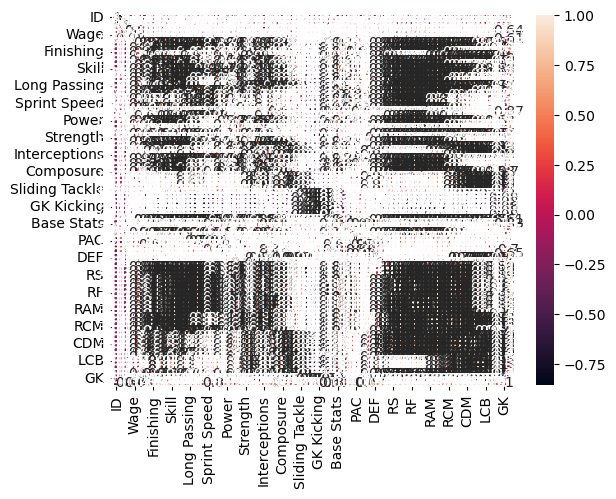

In [1181]:
correlations_matrix = numerical_columns.corr()
sns.heatmap(correlations_matrix, annot=True)  #Mapa de calor de correlaciones
plt.show()

In [1182]:
categorical_columns = df.select_dtypes(include='object') #Solo columnas objeto
categorical_columns.describe()

,Name,Nationality,Club,BP,Position,Team & Contract,Height,Weight,foot,Joined,Loan Date End,Contract,A/W,D/W,Hits
count,11701,11701,11683,11701,11413,11701,11701,11701,11701,11660,629,11701,11642,11642,11701
unique,11232,159,885,15,543,7655,21,55,2,1689,34,362,3,3,462
top,J. Rojas,England,OGC Nice,CB,CB,India Free,"6'0""",154lbs,Right,"Jul 1, 2019","Jun 30, 2021",2019 ~ 2021,Medium,Medium,3
freq,8,1162,35,2170,1352,28,1751,931,8828,818,370,922,7494,8350,2357


In [1183]:
categorical_columns.columns.tolist()

['Name',
 'Nationality',
 'Club',
 'BP',
 'Position',
 'Team & Contract',
 'Height',
 'Weight',
 'foot',
 'Joined',
 'Loan Date End',
 'Contract',
 'A/W',
 'D/W',
 'Hits']

In [1184]:
columns_to_drop = ['Name',
 'Nationality',
 'Club','Position',
 'Team & Contract',
 'Height',
 'Weight', 'Joined',
 'Loan Date End',
 'Contract','Hits', "ID"]

df.drop(columns=columns_to_drop, inplace=True)

In [1185]:
for column in df.columns:
    df[column].fillna(1, inplace=True)

In [1186]:

nan_summary = df.isna().sum()

nan_summary_df = pd.DataFrame({'Column Name': nan_summary.index, 'NaN Count': nan_summary.values})
nan_summary_df = nan_summary_df[nan_summary_df['NaN Count'] != 0]

print(nan_summary_df)

Empty DataFrame
Columns: [Column Name, NaN Count]
Index: []


In [1187]:
numerical_columns= df.select_dtypes(include=[np.number]) #Solo columnas numero
numerical_columns.describe()

,Age,Growth,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
count,11701.00000,11701.000000,1.170100e+04,11701.000000,1.170100e+04,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,...,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000
mean,25.27049,5.534655,2.292355e+06,105.972054,4.352930e+06,258.482181,51.593795,48.048116,53.494060,60.436800,...,56.545765,56.545765,56.972481,56.180668,54.917870,54.917870,54.917870,56.180668,22.667977,66.921972
std,4.95764,5.810903,5.367535e+06,222.365228,1.019417e+07,72.267012,17.872747,19.399617,16.956195,13.971811,...,13.439439,13.439439,13.231609,13.541415,14.451097,14.451097,14.451097,13.541415,14.524695,6.876081
min,16.00000,-1.000000,0.000000e+00,0.000000,0.000000e+00,33.000000,6.000000,3.000000,5.000000,8.000000,...,18.000000,18.000000,16.000000,15.000000,18.000000,18.000000,18.000000,15.000000,10.000000,38.000000
25%,21.00000,0.000000,3.750000e+02,3.000000,4.990000e+02,232.000000,41.000000,33.000000,46.000000,56.000000,...,49.000000,49.000000,51.000000,49.000000,44.000000,44.000000,44.000000,49.000000,17.000000,62.000000
50%,25.00000,4.000000,8.000000e+02,7.000000,1.300000e+06,271.000000,56.000000,52.000000,56.000000,63.000000,...,59.000000,59.000000,59.000000,59.000000,57.000000,57.000000,57.000000,59.000000,18.000000,67.000000
75%,29.00000,10.000000,2.400000e+06,30.000000,3.900000e+06,306.000000,65.000000,64.000000,65.000000,69.000000,...,66.000000,66.000000,66.000000,66.000000,67.000000,67.000000,67.000000,66.000000,20.000000,72.000000
max,43.00000,26.000000,9.000000e+07,950.000000,1.665000e+08,437.000000,94.000000,95.000000,93.000000,94.000000,...,89.000000,89.000000,87.000000,86.000000,89.000000,89.000000,89.000000,86.000000,91.000000,93.000000


In [1188]:
categorical_columns = df.select_dtypes(include='object') #Solo columnas objeto
categorical_columns.describe()

,BP,foot,A/W,D/W
count,11701,11701,11701,11701
unique,15,2,4,4
top,CB,Right,Medium,Medium
freq,2170,8828,7494,8350


In [1189]:
column_to_sort = 'OVA'
sorted_df = df.sort_values(by=column_to_sort, ascending=False)
sorted_df

,Age,BP,foot,Growth,Value,Wage,Release Clause,Attacking,Crossing,Finishing,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
5291,33,RW,Left,0,67500000.0,560.0,138400000.0,429,85,95,...,68,68,69,65,55,55,55,65,22,93
8048,35,ST,Right,0,46000000.0,220.0,75900000.0,437,84,95,...,64,64,68,64,57,57,57,64,23,92
2219,31,ST,Right,0,80000000.0,240.0,132000000.0,423,71,94,...,68,68,67,64,63,63,63,64,22,91
4782,28,LW,Right,0,90000000.0,270.0,166500000.0,408,85,87,...,65,65,70,65,52,52,52,65,23,91
9219,29,CAM,Right,0,87000000.0,370.0,161000000.0,407,94,82,...,83,83,82,78,72,72,72,78,24,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8049,21,LB,Left,10,45.0,2.0,79.0,163,40,18,...,47,47,49,50,49,49,49,50,17,47
7508,18,CAM,Right,18,60.0,500.0,131.0,200,30,34,...,48,48,47,48,47,47,47,48,16,47
11392,18,GK,Right,11,45.0,500.0,0.0,73,12,13,...,21,21,18,18,22,22,22,18,45,45
1925,20,RM,Right,20,0.0,0.0,0.0,144,28,28,...,44,44,37,37,31,31,31,37,20,42


In [1190]:
target_column = 'OVA'
correlations = numerical_columns.corr()[target_column]
correlations

Age               0.519799
Growth           -0.596642
Value             0.638858
Wage             -0.316637
Release Clause    0.606809
                    ...   
CB                0.375964
RCB               0.375964
RB                0.407377
GK                0.099022
OVA               1.000000
Name: OVA, Length: 85, dtype: float64

Main function

In [1191]:
def clean_data(df):
    
    columns_to_change = [ 'LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB','GK']
    def transform_expression(expression):
        numbers = re.findall(r'\d+', expression)  
        numbers = list(map(int, numbers))         
        return sum(numbers)  
   
    for column in columns_to_change:
        df[column] = df[column].apply(transform_expression)
    
    columns_to_transform = ['Value','Wage','Release Clause']

    def transform_currency(value):
        if 'M' in value:
            return float(re.search(r'[\d.]+', value).group()) * 1000000
        elif 'k' in value:
            return float(re.search(r'[\d.]+', value).group()) * 1000
        else:
            return float(re.search(r'[\d.]+', value).group())

    for value in columns_to_transform:
        df[value] = df[value].apply(transform_currency)

    def remove_character(value, character):
        return value.replace(character, '')

    columns_to_process = ['W/F', "SM", 'IR']
    character_to_remove = '★'
    for column in columns_to_process:
        df[column] = df[column].apply(lambda x: remove_character(x, character_to_remove))

    for column in columns_to_process:
        df[column] = df[column].astype(int)
    
    for column in df.columns:
        df[column].fillna(1, inplace=True)
    
    columns_to_drop = ['Name','Nationality','Club','Position','Team & Contract','Height','Weight', 'Joined','Loan Date End','Contract','Hits', "ID"]

    df.drop(columns=columns_to_drop, inplace=True)
    
    return df

    


    

    

In [1192]:
df_raw = pd.read_csv('fifa21_train.csv')

In [1193]:
df_check = clean_data(df_raw)

In [1194]:
df_check

,Age,BP,foot,Growth,Value,Wage,Release Clause,Attacking,Crossing,Finishing,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,26,CM,Right,1,525.0,4.0,801.0,258,54,47,...,60,60,60,59,55,55,55,59,16,64
1,30,ST,Right,0,8500000.0,23.0,0.0,365,66,79,...,55,55,59,55,50,50,50,55,20,77
2,33,CAM,Right,0,9000000.0,49.0,15300000.0,336,73,76,...,58,58,61,55,43,43,43,55,14,80
3,22,CDM,Right,13,275.0,4.0,694.0,242,44,42,...,60,60,58,59,60,60,60,59,16,59
4,23,CDM,Right,8,725.0,2.0,1400000.0,249,49,37,...,66,66,66,65,63,63,63,65,17,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,25,LB,Left,5,625.0,3.0,891.0,224,62,24,...,62,62,65,65,63,63,63,65,18,65
11697,27,GK,Right,4,1600000.0,4.0,2900000.0,84,12,14,...,28,28,27,26,28,28,28,26,71,70
11698,22,RM,Right,8,1100000.0,2.0,1700000.0,286,64,66,...,46,46,51,47,37,37,37,47,19,67
11699,26,CM,Right,7,0.0,0.0,0.0,254,64,66,...,68,68,66,64,60,60,60,64,25,68


In [1195]:
numerical_columns = df_check.select_dtypes(include=[np.number])

In [1196]:
y = numerical_columns['OVA']
X = numerical_columns.drop(["OVA"], axis=1)

# 1. MODEL 1: NORMALISED AND ALL AND 84 COLUMS "LM"

In [1301]:

MinMaxtransformer = MinMaxScaler().fit(numerical_columns) #IMPORTANTE ESTO ES EL NOMBRE DEL TRANSFORMADOR
transformer_nor = MinMaxScaler().fit(X) #Aplicar el min y el max, pero recuerda que X  tiene que ser valores numericos
x_normalized = transformer_nor.transform(X) #Convertirlo entre 0 y 1 
print(x_normalized.shape)
x_normalized
X = df_normalizado = pd.DataFrame(x_normalized, columns=X.columns) #df.normalizado para asi poder tener un data set normalizado al que llamar

(11701, 84)


In [1298]:
df_normalizado

,Age,Growth,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,...,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK
0,0.370370,0.074074,0.000006,0.004211,0.000005,0.556931,0.545455,0.478261,0.431818,0.720930,...,0.591549,0.591549,0.591549,0.619718,0.619718,0.521127,0.521127,0.521127,0.619718,0.074074
1,0.518519,0.037037,0.094444,0.024211,0.000000,0.821782,0.681818,0.826087,0.806818,0.697674,...,0.521127,0.521127,0.521127,0.605634,0.563380,0.450704,0.450704,0.450704,0.563380,0.123457
2,0.629630,0.037037,0.100000,0.051579,0.091892,0.750000,0.761364,0.793478,0.329545,0.813953,...,0.563380,0.563380,0.563380,0.633803,0.563380,0.352113,0.352113,0.352113,0.563380,0.049383
3,0.222222,0.518519,0.000003,0.004211,0.000004,0.517327,0.431818,0.423913,0.602273,0.627907,...,0.591549,0.591549,0.591549,0.591549,0.619718,0.591549,0.591549,0.591549,0.619718,0.074074
4,0.259259,0.333333,0.000008,0.002105,0.008408,0.534653,0.488636,0.369565,0.636364,0.697674,...,0.676056,0.676056,0.676056,0.704225,0.704225,0.633803,0.633803,0.633803,0.704225,0.086420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,0.333333,0.222222,0.000007,0.003158,0.000005,0.472772,0.636364,0.228261,0.522727,0.593023,...,0.619718,0.619718,0.619718,0.690141,0.704225,0.633803,0.633803,0.633803,0.704225,0.098765
11697,0.407407,0.185185,0.017778,0.004211,0.017417,0.126238,0.068182,0.119565,0.090909,0.244186,...,0.140845,0.140845,0.140845,0.154930,0.154930,0.140845,0.140845,0.140845,0.154930,0.753086
11698,0.222222,0.333333,0.012222,0.002105,0.010210,0.626238,0.659091,0.684783,0.522727,0.651163,...,0.394366,0.394366,0.394366,0.492958,0.450704,0.267606,0.267606,0.267606,0.450704,0.111111
11699,0.370370,0.296296,0.000000,0.000000,0.000000,0.547030,0.659091,0.684783,0.522727,0.755814,...,0.704225,0.704225,0.704225,0.704225,0.690141,0.591549,0.591549,0.591549,0.690141,0.185185


In [1302]:
X

,Age,Growth,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,...,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK
0,0.370370,0.074074,0.000006,0.004211,0.000005,0.556931,0.545455,0.478261,0.431818,0.720930,...,0.591549,0.591549,0.591549,0.619718,0.619718,0.521127,0.521127,0.521127,0.619718,0.074074
1,0.518519,0.037037,0.094444,0.024211,0.000000,0.821782,0.681818,0.826087,0.806818,0.697674,...,0.521127,0.521127,0.521127,0.605634,0.563380,0.450704,0.450704,0.450704,0.563380,0.123457
2,0.629630,0.037037,0.100000,0.051579,0.091892,0.750000,0.761364,0.793478,0.329545,0.813953,...,0.563380,0.563380,0.563380,0.633803,0.563380,0.352113,0.352113,0.352113,0.563380,0.049383
3,0.222222,0.518519,0.000003,0.004211,0.000004,0.517327,0.431818,0.423913,0.602273,0.627907,...,0.591549,0.591549,0.591549,0.591549,0.619718,0.591549,0.591549,0.591549,0.619718,0.074074
4,0.259259,0.333333,0.000008,0.002105,0.008408,0.534653,0.488636,0.369565,0.636364,0.697674,...,0.676056,0.676056,0.676056,0.704225,0.704225,0.633803,0.633803,0.633803,0.704225,0.086420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,0.333333,0.222222,0.000007,0.003158,0.000005,0.472772,0.636364,0.228261,0.522727,0.593023,...,0.619718,0.619718,0.619718,0.690141,0.704225,0.633803,0.633803,0.633803,0.704225,0.098765
11697,0.407407,0.185185,0.017778,0.004211,0.017417,0.126238,0.068182,0.119565,0.090909,0.244186,...,0.140845,0.140845,0.140845,0.154930,0.154930,0.140845,0.140845,0.140845,0.154930,0.753086
11698,0.222222,0.333333,0.012222,0.002105,0.010210,0.626238,0.659091,0.684783,0.522727,0.651163,...,0.394366,0.394366,0.394366,0.492958,0.450704,0.267606,0.267606,0.267606,0.450704,0.111111
11699,0.370370,0.296296,0.000000,0.000000,0.000000,0.547030,0.659091,0.684783,0.522727,0.755814,...,0.704225,0.704225,0.704225,0.704225,0.690141,0.591549,0.591549,0.591549,0.690141,0.185185


In [1303]:
lm = linear_model.LinearRegression()

lm.fit(X,y)
print("b0 = " , lm.intercept_)
print("b1 = " , lm.coef_)


b0 =  80528053664.98343
b1 =  [ 1.33249123e+00 -2.47594051e+00  1.99725722e+01 -9.52620015e-01
 -3.85063650e+00 -6.28883068e+11  1.24133198e+11  1.29775616e+11
  1.24133198e+11  1.21311989e+11  1.25543802e+11 -6.59520995e+10
  7.66022455e+08  7.82858117e+08  7.49186800e+08  7.07097648e+08
  7.66022468e+08  1.82177613e+09 -1.27030665e+10 -1.28542934e+10
 -1.43665633e+10 -1.08883427e+10 -1.45177902e+10  4.70978892e+10
 -2.46905822e+10 -2.79628281e+10 -2.52855360e+10 -2.29057209e+10
 -2.67729205e+10 -5.24271886e+10  7.25827541e+01  7.58855410e+01
  7.72886451e+01  7.56425400e+01  7.26220207e+01  2.61338043e+00
  1.68263692e+11 -7.28991438e+10 -6.88036863e+10 -7.28991438e+10
 -6.23576865e+10  1.63012238e+01  1.63001709e+01  9.29496765e+00
  1.78810730e+01  1.57201347e+01  2.29715786e+11  1.99308217e+10
 -1.20925903e-01  2.91586304e+00  1.68142700e+00 -5.32502870e+09
 -5.78145973e+09 -5.17288502e+09 -5.09681317e+09 -5.85753157e+09
 -5.02074134e+09 -6.15605437e+09  3.17381859e+09  2.98223578

### R2

In [1304]:
print(lm.score(X,y))

0.9106984265979856


## Train X-y

In [1305]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #Acuerdate de definir X e y
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9360, 84)
(2341, 84)
(9360,)
(2341,)


In [1306]:
#Entrenar el model_selection
lm.fit(X_train,y_train)
from sklearn.metrics import r2_score
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.9111696917055258

In [1307]:
#Predicciones
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

0.9063926548928368

In [1308]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,predictions_test)
mse

4.445147611528622

In [1309]:

rmse = np.sqrt(mean_squared_error(y_test,predictions_test))
rmse

2.108351870900259

In [1310]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions_test)
print(mae)

1.6130189630833511


# 2. Model 2: Standarized data 83 columns (LM2)

In [1311]:
y1 = numerical_columns['OVA']
X1 = numerical_columns.drop(["OVA"], axis=1)

In [1313]:
# scaling standard scaler: make data distributed with mean=0 and std=1

from sklearn.preprocessing import StandardScaler

transformer_std = StandardScaler().fit(X1)
x_standardized = transformer_std.transform(X1)
print(x_standardized.shape)
X1 = df.standarizado =pd.DataFrame(x_standardized, columns=X.columns)
df.standarizado

(11701, 84)


,Age,Growth,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,...,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK
0,0.147155,-0.780403,-0.426998,-0.458599,-0.426942,-0.006672,0.134636,-0.054030,-0.618919,0.684493,...,0.257033,0.257033,0.257033,0.228819,0.208210,0.005684,0.005684,0.005684,0.208210,-0.459098
1,0.954025,-0.952501,1.156566,-0.373150,-0.427020,1.474011,0.806078,1.595558,1.327356,0.541342,...,-0.115022,-0.115022,-0.115022,0.153240,-0.087193,-0.340326,-0.340326,-0.340326,-0.087193,-0.183693
2,1.559177,-0.952501,1.249723,-0.256220,1.073902,1.072704,1.197752,1.440909,-1.149721,1.257099,...,0.108211,0.108211,0.108211,0.304399,-0.087193,-0.824739,-0.824739,-0.824739,-0.087193,-0.596801
3,-0.659715,1.284768,-0.427045,-0.458599,-0.426952,-0.228083,-0.424899,-0.311778,0.265751,0.111887,...,0.257033,0.257033,0.257033,0.077660,0.208210,0.351693,0.351693,0.351693,0.208210,-0.459098
4,-0.457997,0.424280,-0.426961,-0.467593,-0.289681,-0.131216,-0.145132,-0.569526,0.442685,0.541342,...,0.703499,0.703499,0.703499,0.682298,0.651314,0.559298,0.559298,0.559298,0.651314,-0.390247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,-0.054563,-0.092013,-0.426980,-0.463096,-0.426933,-0.477170,0.582264,-1.239671,-0.147095,-0.102840,...,0.405855,0.405855,0.405855,0.606718,0.651314,0.559298,0.559298,0.559298,0.651314,-0.321396
11697,0.348872,-0.264111,-0.128995,-0.458599,-0.142532,-2.414513,-2.215411,-1.755167,-2.388259,-2.250112,...,-2.124120,-2.124120,-2.124120,-2.265315,-2.228863,-1.862767,-1.862767,-1.862767,-2.228863,3.327718
11698,-0.659715,0.424280,-0.222151,-0.467593,-0.260251,0.380796,0.694171,0.925413,-0.147095,0.255039,...,-0.784721,-0.784721,-0.784721,-0.451399,-0.677999,-1.239950,-1.239950,-1.239950,-0.677999,-0.252545
11699,0.147155,0.252182,-0.427096,-0.476588,-0.427020,-0.062025,0.694171,0.925413,-0.147095,0.899220,...,0.852322,0.852322,0.852322,0.682298,0.577463,0.351693,0.351693,0.351693,0.577463,0.160563


In [1314]:
lm1 = linear_model.LinearRegression()

In [1315]:
lm1.fit(X1,y1)
print("b0 = " , lm1.intercept_)
print("b1 = " , lm1.coef_)

b0 =  66.92300903729848
b1 =  [ 2.44367592e-01 -5.58328943e-01  1.27504509e+00 -2.23657952e-01
 -3.20812349e-01  4.28100424e+12 -1.09491087e+12 -1.18844918e+12
 -1.03876157e+12 -8.55933778e+11 -1.09610988e+12 -1.24800228e+11
 -7.19357957e+09 -7.32253212e+09 -6.96770267e+09 -5.93265113e+09
 -6.33109221e+09  1.42177924e+12 -4.08450059e+11 -4.02381654e+11
 -4.14099849e+11 -2.50031794e+11 -4.04706414e+11 -5.31783574e+12
  1.41847582e+12  1.32052576e+12  1.61145649e+12  1.34012266e+12
  2.00082775e+12 -1.27303774e+11  1.40843887e+01  1.66812923e+01
  1.54879011e+01  1.10881348e+01  1.32279205e+01  3.82934570e-01
 -8.71021447e+11  2.44656248e+11  2.60171076e+11  2.58644637e+11
 -1.64292646e+11  2.69311523e+00  2.80499268e+00  1.58886719e+00
  2.89566040e+00  2.86474609e+00  5.27471176e+11  3.53380565e+11
 -1.75781250e-02  6.27441406e-01  2.04101562e-01 -9.85797501e+10
 -1.21408189e+11 -8.91809112e+10 -8.60551530e+10 -1.47609836e+11
 -8.55254337e+10 -6.13196406e+10  3.02146699e+10  3.11049708

In [1316]:
lm1.fit(X1,y1) #Crear modelo
print(lm1.score(X1,y1)) #Conseguir R2

0.9103309923955923


In [1317]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2) #Acuerdate de definir X e y
print(X1_train.shape)
print(X1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(9360, 84)
(2341, 84)
(9360,)
(2341,)


In [1318]:
lm1 = linear_model.LinearRegression()
lm1.fit(X1_train,y1_train)
from sklearn.metrics import r2_score
predictions = lm1.predict(X1_train)
r2_score(y1_train, predictions)

0.9122164747142115

In [1319]:
predictions_test1 = lm1.predict(X1_test)
r2_score(y1_test, predictions_test1)

0.8991681746463026

In [1320]:
from sklearn.metrics import mean_squared_error
mse1=mean_squared_error(y1_test,predictions_test1)
mse1

4.595051317751681

In [1321]:
rmse1 = np.sqrt(mean_squared_error(y1_test,predictions_test1))
rmse1

2.143607081008943

In [1322]:
from sklearn.metrics import mean_absolute_error
mae1 = mean_absolute_error(y1_test, predictions_test1)
print(mae1)

1.6620916627638245


# 3. Model 3: Normalised and encoding categorical data (91 columns) (LM2)

In [1323]:
df

,Age,BP,foot,Growth,Value,Wage,Release Clause,Attacking,Crossing,Finishing,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,26,CM,Right,1,525.0,4.0,801.0,258,54,47,...,60,60,60,59,55,55,55,59,16,64
1,30,ST,Right,0,8500000.0,23.0,0.0,365,66,79,...,55,55,59,55,50,50,50,55,20,77
2,33,CAM,Right,0,9000000.0,49.0,15300000.0,336,73,76,...,58,58,61,55,43,43,43,55,14,80
3,22,CDM,Right,13,275.0,4.0,694.0,242,44,42,...,60,60,58,59,60,60,60,59,16,59
4,23,CDM,Right,8,725.0,2.0,1400000.0,249,49,37,...,66,66,66,65,63,63,63,65,17,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,25,LB,Left,5,625.0,3.0,891.0,224,62,24,...,62,62,65,65,63,63,63,65,18,65
11697,27,GK,Right,4,1600000.0,4.0,2900000.0,84,12,14,...,28,28,27,26,28,28,28,26,71,70
11698,22,RM,Right,8,1100000.0,2.0,1700000.0,286,64,66,...,46,46,51,47,37,37,37,47,19,67
11699,26,CM,Right,7,0.0,0.0,0.0,254,64,66,...,68,68,66,64,60,60,60,64,25,68


In [1324]:
categorical_columns

,BP,foot,A/W,D/W
0,CM,Right,High,Medium
1,ST,Right,High,Low
2,CAM,Right,High,Medium
3,CDM,Right,Medium,Medium
4,CDM,Right,Low,Medium
...,...,...,...,...
11696,LB,Left,Medium,Medium
11697,GK,Right,Medium,Medium
11698,RM,Right,High,Medium
11699,CM,Right,1,1


Dropping: BP

In [1325]:
from sklearn.preprocessing import LabelEncoder
def enconding_function (df):
    categorical_columns = [ 'foot', "A/W", "D/W"]

    df[categorical_columns] = df[categorical_columns].astype(str)

    encoder = OneHotEncoder(drop='first', sparse=False)

    encoded_data = encoder.fit_transform(df[categorical_columns])

    encoded_feature_names = encoder.get_feature_names_out(input_features=categorical_columns)

    encoded_df = pd.DataFrame(encoded_data, columns=encoded_feature_names)

    return encoded_df

encoded_df

,foot_Right,A/W_High,A/W_Low,A/W_Medium,D/W_High,D/W_Low,D/W_Medium
0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
11696,0.0,0.0,0.0,1.0,0.0,0.0,1.0
11697,1.0,0.0,0.0,1.0,0.0,0.0,1.0
11698,1.0,1.0,0.0,0.0,0.0,0.0,1.0
11699,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1326]:
df3 = pd.concat([numerical_columns, encoded_df], axis=1)
df3


,Age,Growth,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,...,RB,GK,OVA,foot_Right,A/W_High,A/W_Low,A/W_Medium,D/W_High,D/W_Low,D/W_Medium
0,26,1,525.0,4.0,801.0,258,54,47,43,70,...,59,16,64,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,30,0,8500000.0,23.0,0.0,365,66,79,76,68,...,55,20,77,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,33,0,9000000.0,49.0,15300000.0,336,73,76,34,78,...,55,14,80,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,22,13,275.0,4.0,694.0,242,44,42,58,62,...,59,16,59,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,23,8,725.0,2.0,1400000.0,249,49,37,61,68,...,65,17,65,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,25,5,625.0,3.0,891.0,224,62,24,51,59,...,65,18,65,0.0,0.0,0.0,1.0,0.0,0.0,1.0
11697,27,4,1600000.0,4.0,2900000.0,84,12,14,13,29,...,26,71,70,1.0,0.0,0.0,1.0,0.0,0.0,1.0
11698,22,8,1100000.0,2.0,1700000.0,286,64,66,51,64,...,47,19,67,1.0,1.0,0.0,0.0,0.0,0.0,1.0
11699,26,7,0.0,0.0,0.0,254,64,66,51,73,...,64,25,68,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1327]:
y2 = df3['OVA']
X2 = df3.drop(["OVA"], axis=1)

In [1331]:
MinMaxtransformer2 = MinMaxScaler().fit(df3) #IMPORTANTE ESTO ES EL NOMBRE DEL TRANSFORMADOR
transformer2 = MinMaxScaler().fit(X2) #Aplicar el min y el max, pero recuerda que X  tiene que ser valores numericos
x_normalized2 = transformer2.transform(X2) #Convertirlo entre 0 y 1 
print(x_normalized2.shape)
x_normalized2
X2 = df_normalizado2 = pd.DataFrame(x_normalized2, columns=X2.columns) #df.normalizado para asi poder tener un data set normalizado al que llamar

(11701, 91)


In [1332]:
df_normalizado2

,Age,Growth,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,...,RCB,RB,GK,foot_Right,A/W_High,A/W_Low,A/W_Medium,D/W_High,D/W_Low,D/W_Medium
0,0.370370,0.074074,0.000006,0.004211,0.000005,0.556931,0.545455,0.478261,0.431818,0.720930,...,0.521127,0.619718,0.074074,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.518519,0.037037,0.094444,0.024211,0.000000,0.821782,0.681818,0.826087,0.806818,0.697674,...,0.450704,0.563380,0.123457,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.629630,0.037037,0.100000,0.051579,0.091892,0.750000,0.761364,0.793478,0.329545,0.813953,...,0.352113,0.563380,0.049383,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.222222,0.518519,0.000003,0.004211,0.000004,0.517327,0.431818,0.423913,0.602273,0.627907,...,0.591549,0.619718,0.074074,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.259259,0.333333,0.000008,0.002105,0.008408,0.534653,0.488636,0.369565,0.636364,0.697674,...,0.633803,0.704225,0.086420,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,0.333333,0.222222,0.000007,0.003158,0.000005,0.472772,0.636364,0.228261,0.522727,0.593023,...,0.633803,0.704225,0.098765,0.0,0.0,0.0,1.0,0.0,0.0,1.0
11697,0.407407,0.185185,0.017778,0.004211,0.017417,0.126238,0.068182,0.119565,0.090909,0.244186,...,0.140845,0.154930,0.753086,1.0,0.0,0.0,1.0,0.0,0.0,1.0
11698,0.222222,0.333333,0.012222,0.002105,0.010210,0.626238,0.659091,0.684783,0.522727,0.651163,...,0.267606,0.450704,0.111111,1.0,1.0,0.0,0.0,0.0,0.0,1.0
11699,0.370370,0.296296,0.000000,0.000000,0.000000,0.547030,0.659091,0.684783,0.522727,0.755814,...,0.591549,0.690141,0.185185,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1333]:
lm2 = linear_model.LinearRegression()

In [1334]:
lm2.fit(X2,y2)
print("b0 = " , lm2.intercept_)
print("b1 = " , lm2.coef_)

b0 =  2414971161722.995
b1 =  [ 1.20581437e+00 -2.33619424e+00  1.89292266e+01 -9.73023414e-01
 -2.86634208e+00  9.68802133e+12 -2.18408608e+12 -2.28336272e+12
 -2.18408608e+12 -2.13444776e+12 -2.20890524e+12 -4.83071342e+12
  9.53155566e+11  9.74104040e+11  9.32207092e+11  8.79835907e+11
  9.53155566e+11 -8.17643764e+12  1.88628594e+12  1.90874172e+12
  2.13329957e+12  1.61681652e+12  2.15575536e+12  7.82962196e+12
 -2.15920703e+12 -2.44536700e+12 -2.21123611e+12 -2.00311977e+12
 -2.34130883e+12 -3.01168401e+11  6.84848047e+01  7.19225747e+01
  7.25961956e+01  7.16582031e+01  6.93116455e+01  2.69531250e+00
  9.28298793e+11 -4.05137289e+11 -3.82376767e+11 -4.05137289e+11
 -3.58214226e+11  1.75510254e+01  1.75117188e+01  9.05932617e+00
  1.71982422e+01  1.61903076e+01  1.31960416e+12  3.60686241e+12
  4.49218750e-02  2.87792969e+00  1.65377808e+00 -9.63665530e+11
 -1.04626543e+12 -9.36132229e+11 -9.22365579e+11 -1.06003208e+12
 -9.08598928e+11 -5.49143157e+11  2.86286284e+11  2.62856873

In [1335]:
lm2.fit(X2,y2) #Crear modelo
print(lm2.score(X2,y2)) #Conseguir R2

0.9119102173053956


In [1336]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2) #Acuerdate de definir X e y
print(X2_train.shape)
print(X2_test.shape)
print(y2_train.shape)
print(y2_test.shape)

(9360, 91)
(2341, 91)
(9360,)
(2341,)


In [1337]:
lm2 = linear_model.LinearRegression()
lm2.fit(X2_train,y2_train)
from sklearn.metrics import r2_score
predictions2 = lm2.predict(X2_train)
r2_score(y2_train, predictions2)

0.9097739354131388

In [1338]:
predictions_test2 = lm2.predict(X2_test)
r2_score(y2_test, predictions_test2)

0.9131223408377575

In [1339]:
from sklearn.metrics import mean_squared_error
mse2=mean_squared_error(y2_test,predictions_test2)
mse2

4.158927400923855

In [1340]:
rmse2 = np.sqrt(mean_squared_error(y2_test,predictions_test2))
rmse2

2.0393448460041905

In [1341]:
from sklearn.metrics import mean_absolute_error
mae2 = mean_absolute_error(y2_test, predictions_test2)
print(mae2)

1.5892689088530543


# PREDICTIONS

Model 1

In [1342]:
test_data_1 = pd.read_csv('fifa21_validate.csv')

In [1343]:
y_validation_1 = test_data_1['OVA']

In [1344]:
prediction1_data = clean_data(test_data_1).drop(["OVA"], axis=1).select_dtypes(include=[np.number])

In [1345]:
prediction1_data

,Age,Growth,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,...,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK
0,23,7,975.0,5.0,0.0,230,47,21,62,60,...,63,63,63,61,63,69,69,69,63,18
1,22,5,1200000.0,3.0,2200000.0,298,62,60,44,62,...,49,49,49,51,47,40,40,40,47,19
2,19,17,120.0,500.0,249.0,48,7,5,11,21,...,20,20,20,18,18,20,20,20,18,55
3,16,23,160.0,500.0,464.0,215,38,31,55,59,...,56,56,56,55,55,56,56,56,55,13
4,24,5,2300000.0,13.0,4300000.0,295,57,59,45,78,...,74,74,74,72,71,70,70,70,71,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,21,11,325.0,1.0,731.0,197,59,23,42,51,...,54,54,54,60,60,56,56,56,60,17
1995,21,9,190.0,700.0,285.0,77,13,9,14,34,...,25,25,25,22,22,24,24,24,22,60
1996,27,0,8000000.0,9.0,12000000.0,332,76,72,34,79,...,62,62,62,64,59,49,49,49,59,20
1997,34,0,140.0,4.0,245.0,268,58,44,61,62,...,63,63,63,62,62,63,63,63,62,16


In [1346]:
X_test_model1 = transformer_nor.transform(prediction1_data)
pd.DataFrame(X_test_model1, columns=prediction1_data.columns) 

,Age,Growth,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,...,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK
0,0.259259,0.296296,0.000011,0.005263,0.000000,0.487624,0.465909,0.195652,0.647727,0.604651,...,0.633803,0.633803,0.633803,0.633803,0.676056,0.718310,0.718310,0.718310,0.676056,0.098765
1,0.222222,0.222222,0.013333,0.003158,0.013213,0.655941,0.636364,0.619565,0.443182,0.627907,...,0.436620,0.436620,0.436620,0.492958,0.450704,0.309859,0.309859,0.309859,0.450704,0.111111
2,0.111111,0.666667,0.000001,0.526316,0.000001,0.037129,0.011364,0.021739,0.068182,0.151163,...,0.028169,0.028169,0.028169,0.028169,0.042254,0.028169,0.028169,0.028169,0.042254,0.555556
3,0.000000,0.888889,0.000002,0.526316,0.000003,0.450495,0.363636,0.304348,0.568182,0.593023,...,0.535211,0.535211,0.535211,0.549296,0.563380,0.535211,0.535211,0.535211,0.563380,0.037037
4,0.296296,0.222222,0.025556,0.013684,0.025826,0.648515,0.579545,0.608696,0.454545,0.813953,...,0.788732,0.788732,0.788732,0.788732,0.788732,0.732394,0.732394,0.732394,0.788732,0.123457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.185185,0.444444,0.000004,0.001053,0.000004,0.405941,0.602273,0.217391,0.420455,0.500000,...,0.507042,0.507042,0.507042,0.619718,0.633803,0.535211,0.535211,0.535211,0.633803,0.086420
1995,0.185185,0.370370,0.000002,0.736842,0.000002,0.108911,0.079545,0.065217,0.102273,0.302326,...,0.098592,0.098592,0.098592,0.084507,0.098592,0.084507,0.084507,0.084507,0.098592,0.617284
1996,0.407407,0.037037,0.088889,0.009474,0.072072,0.740099,0.795455,0.750000,0.329545,0.825581,...,0.619718,0.619718,0.619718,0.676056,0.619718,0.436620,0.436620,0.436620,0.619718,0.123457
1997,0.666667,0.037037,0.000002,0.004211,0.000001,0.581683,0.590909,0.445652,0.636364,0.627907,...,0.633803,0.633803,0.633803,0.647887,0.661972,0.633803,0.633803,0.633803,0.661972,0.074074


In [1347]:
predictions_test_model1 = lm.predict(X_test_model1)
predictions_test_model1

/Users/agustinredondoarena/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([65.21118164, 64.95605469, 53.87768555, ..., 73.11743164,
       65.69213867, 61.32006836])

In [1348]:
r2_score(y_validation_1, predictions_test_model1)

0.9082983674253552

In [1349]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_validation_1,predictions_test_model1)
mse

4.196402520463131

In [1350]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_validation_1, predictions_test_model1)
print(mae)

1.5930733921648323


Model 2

In [1351]:
test_data_2 = pd.read_csv('fifa21_validate.csv')

In [1352]:
y_validation_2 = test_data_2['OVA']

In [1353]:
prediction2_data = clean_data(test_data_2).drop(["OVA"], axis=1).select_dtypes(include=[np.number])



In [1354]:
X1 = transformer_std.transform(prediction2_data)

In [1355]:
predictions_test1 = lm1.predict(X1)
predictions_test1

/Users/agustinredondoarena/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([65.46354039, 65.11237513, 53.66528525, ..., 72.88987458,
       65.87877821, 61.51482925])

In [1356]:
r2_score(y_validation_2, predictions_test1)

0.9072707628665357

In [1357]:
from sklearn.metrics import mean_squared_error
mse1=mean_squared_error(y_validation_2,predictions_test1)
mse1

4.2434272269988575

In [1358]:
from sklearn.metrics import mean_absolute_error
mae1 = mean_absolute_error(y_validation_2, predictions_test1)
mae1

1.5981638597948946

Model 3

In [1359]:
test_data_3 = pd.read_csv('fifa21_validate.csv')

In [1360]:
y_validation_3 = test_data_3['OVA']

In [1361]:
prediction3_data = pd.concat([clean_data(test_data_3).select_dtypes(include=[np.number]).drop(["OVA"], axis=1), enconding_function(test_data_3)], axis=1)


/Users/agustinredondoarena/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [1362]:
X2 = transformer2.transform(prediction3_data)
predictions_test2 = lm2.predict(X2)
predictions_test2

/Users/agustinredondoarena/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([66.046875  , 65.42382812, 53.57421875, ..., 73.29296875,
       65.5625    , 61.5703125 ])

In [1363]:
r2_score(y_validation_3, predictions_test2)

0.90644776286672

In [1364]:
mse2=mean_squared_error(y_validation_3,predictions_test2)
mse2

4.281088925886894

In [1365]:
from sklearn.metrics import mean_absolute_error
mae2 = mean_absolute_error(y_validation_3, predictions_test2)
print(mae2)

1.603050548711856


## Applying new models: quitting tails to Normalized

In [1381]:
y4 = numerical_columns['OVA']
X4 = df_normalizado

,Age,Growth,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,...,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK
0,0.370370,0.074074,0.000006,0.004211,0.000005,0.556931,0.545455,0.478261,0.431818,0.720930,...,0.591549,0.591549,0.591549,0.619718,0.619718,0.521127,0.521127,0.521127,0.619718,0.074074
1,0.518519,0.037037,0.094444,0.024211,0.000000,0.821782,0.681818,0.826087,0.806818,0.697674,...,0.521127,0.521127,0.521127,0.605634,0.563380,0.450704,0.450704,0.450704,0.563380,0.123457
2,0.629630,0.037037,0.100000,0.051579,0.091892,0.750000,0.761364,0.793478,0.329545,0.813953,...,0.563380,0.563380,0.563380,0.633803,0.563380,0.352113,0.352113,0.352113,0.563380,0.049383
3,0.222222,0.518519,0.000003,0.004211,0.000004,0.517327,0.431818,0.423913,0.602273,0.627907,...,0.591549,0.591549,0.591549,0.591549,0.619718,0.591549,0.591549,0.591549,0.619718,0.074074
4,0.259259,0.333333,0.000008,0.002105,0.008408,0.534653,0.488636,0.369565,0.636364,0.697674,...,0.676056,0.676056,0.676056,0.704225,0.704225,0.633803,0.633803,0.633803,0.704225,0.086420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,0.333333,0.222222,0.000007,0.003158,0.000005,0.472772,0.636364,0.228261,0.522727,0.593023,...,0.619718,0.619718,0.619718,0.690141,0.704225,0.633803,0.633803,0.633803,0.704225,0.098765
11697,0.407407,0.185185,0.017778,0.004211,0.017417,0.126238,0.068182,0.119565,0.090909,0.244186,...,0.140845,0.140845,0.140845,0.154930,0.154930,0.140845,0.140845,0.140845,0.154930,0.753086
11698,0.222222,0.333333,0.012222,0.002105,0.010210,0.626238,0.659091,0.684783,0.522727,0.651163,...,0.394366,0.394366,0.394366,0.492958,0.450704,0.267606,0.267606,0.267606,0.450704,0.111111
11699,0.370370,0.296296,0.000000,0.000000,0.000000,0.547030,0.659091,0.684783,0.522727,0.755814,...,0.704225,0.704225,0.704225,0.704225,0.690141,0.591549,0.591549,0.591549,0.690141,0.185185


In [1382]:
iqr = np.percentile(df_normalizado,75) - np.percentile(df_normalizado,25) #Calcular el 25% inferior y 75%

upper_limit = np.percentile(df_normalizado,75) + 1.5*iqr #definir upper_limit
lower_limit = np.percentile(df_normalizado,25) - 1.5*iqr #definir lower_limit

df_normalizado_cut= df_normalizado[(df_normalizado>lower_limit) & (df_normalizado<upper_limit)].copy() #Crear data set sin outlayers
df_normalizado_cut

,Age,Growth,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,...,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK
0,0.370370,0.074074,0.000006,0.004211,0.000005,0.556931,0.545455,0.478261,0.431818,0.720930,...,0.591549,0.591549,0.591549,0.619718,0.619718,0.521127,0.521127,0.521127,0.619718,0.074074
1,0.518519,0.037037,0.094444,0.024211,0.000000,0.821782,0.681818,0.826087,0.806818,0.697674,...,0.521127,0.521127,0.521127,0.605634,0.563380,0.450704,0.450704,0.450704,0.563380,0.123457
2,0.629630,0.037037,0.100000,0.051579,0.091892,0.750000,0.761364,0.793478,0.329545,0.813953,...,0.563380,0.563380,0.563380,0.633803,0.563380,0.352113,0.352113,0.352113,0.563380,0.049383
3,0.222222,0.518519,0.000003,0.004211,0.000004,0.517327,0.431818,0.423913,0.602273,0.627907,...,0.591549,0.591549,0.591549,0.591549,0.619718,0.591549,0.591549,0.591549,0.619718,0.074074
4,0.259259,0.333333,0.000008,0.002105,0.008408,0.534653,0.488636,0.369565,0.636364,0.697674,...,0.676056,0.676056,0.676056,0.704225,0.704225,0.633803,0.633803,0.633803,0.704225,0.086420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,0.333333,0.222222,0.000007,0.003158,0.000005,0.472772,0.636364,0.228261,0.522727,0.593023,...,0.619718,0.619718,0.619718,0.690141,0.704225,0.633803,0.633803,0.633803,0.704225,0.098765
11697,0.407407,0.185185,0.017778,0.004211,0.017417,0.126238,0.068182,0.119565,0.090909,0.244186,...,0.140845,0.140845,0.140845,0.154930,0.154930,0.140845,0.140845,0.140845,0.154930,0.753086
11698,0.222222,0.333333,0.012222,0.002105,0.010210,0.626238,0.659091,0.684783,0.522727,0.651163,...,0.394366,0.394366,0.394366,0.492958,0.450704,0.267606,0.267606,0.267606,0.450704,0.111111
11699,0.370370,0.296296,0.000000,0.000000,0.000000,0.547030,0.659091,0.684783,0.522727,0.755814,...,0.704225,0.704225,0.704225,0.704225,0.690141,0.591549,0.591549,0.591549,0.690141,0.185185


In [1383]:
lm4 = linear_model.LinearRegression()

In [1384]:
lm4.fit(X4,y4)
print("b0 = " , lm.intercept_)
print("b1 = " , lm.coef_)

b0 =  -1985684531918.265
b1 =  [ 1.32352059e+00 -2.43624432e+00  2.02425267e+01 -1.05937970e+00
 -4.00964162e+00  1.29444537e+13 -3.18562878e+12 -3.33043009e+12
 -3.18562878e+12 -3.11322813e+12 -3.22182911e+12  7.10252815e+11
 -5.29888957e+11 -5.41534868e+11 -5.18243046e+11 -4.89128268e+11
 -5.29888957e+11 -3.25329919e+12  4.29160926e+11  4.34269984e+11
  4.85360571e+11  3.67852222e+11  4.90469629e+11 -7.16449578e+12
  1.56682120e+12  1.77447221e+12  1.60457593e+12  1.45355702e+12
  1.69896275e+12 -1.49329641e+12  1.18780993e+02  1.25310800e+02
  1.28803075e+02  1.24623535e+02  1.17953125e+02  2.39453125e+00
 -4.27185037e+12  1.15057433e+12  1.08593532e+12  1.15057433e+12
 -1.77614921e+12  1.62683105e+01  1.55748901e+01  1.00256233e+01
  1.82275391e+01  1.61643066e+01  6.54305085e+12 -5.08873625e+12
 -8.34960938e-02  2.92529297e+00  1.83508301e+00  1.35958602e+12
  1.47612196e+12  1.32074071e+12  1.30131805e+12  1.49554462e+12
  1.28189539e+12  6.99495120e+11 -3.51362199e+11 -3.4813292

In [1385]:
lm4.fit(X4,y4) #Crear modelo
print(lm4.score(X4,y4)) #Conseguir R2

0.9106984265979856


In [1386]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2) #Acuerdate de definir X e y
print(X4_train.shape)
print(X4_test.shape)
print(y4_train.shape)
print(y4_test.shape)

(9360, 84)
(2341, 84)
(9360,)
(2341,)


Predictions for model 4

In [1387]:
test_data_4 = pd.read_csv('fifa21_validate.csv')

In [1388]:
y_validation_4 = test_data_4['OVA']

In [1389]:
prediction4_data = clean_data(test_data_4).drop(["OVA"], axis=1).select_dtypes(include=[np.number])

In [1390]:
X4 = transformer.transform(prediction4_data)
predictions_test4 = lm4.predict(X4)
predictions_test4

/Users/agustinredondoarena/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([65.25718689, 64.89201355, 53.76751709, ..., 73.06544495,
       65.78248596, 61.5737915 ])

In [1391]:
r2_score(y_validation_4, predictions_test4)

0.9085109129049652

In [1392]:
mse2=mean_squared_error(y_validation_4,predictions_test4)
mse2

4.1866761245276765

In [1393]:
from sklearn.metrics import mean_absolute_error
mae2 = mean_absolute_error(y_validation_4, predictions_test4)
print(mae2)

1.5912450472672859
